In [1]:
import tensorflow as tf

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from tensorflow import keras

In [4]:
import numpy as np

In [5]:
mnist = keras.datasets.mnist

In [6]:
# %pip install matplotlib
import matplotlib.pyplot as plt

In [7]:
tf.__version__

'2.10.0'

In [8]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'c:\\Users\\Hardik\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [9]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = keras.utils.normalize(x_train,axis=1)
x_test = keras.utils.normalize(x_test,axis=1)

model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
# output
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2582 - accuracy: 0.9248
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1059 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0721 - accuracy: 0.9770


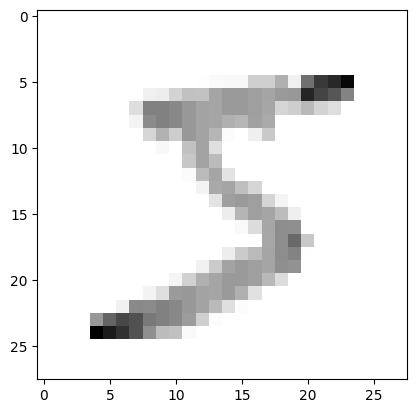

In [10]:
plt.imshow(x_train[0], plt.cm.binary)

In [11]:
val_loss, val_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.1031 - accuracy: 0.9687


In [12]:
print(val_loss, val_acc)

0.10306093841791153 0.9686999917030334


In [13]:
model.save('../data/hand_written_model')

INFO:tensorflow:Assets written to: ../data/hand_written_model\assets


In [14]:
new_model = keras.models.load_model('../data/hand_written_model')

In [15]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 3ms/step


4


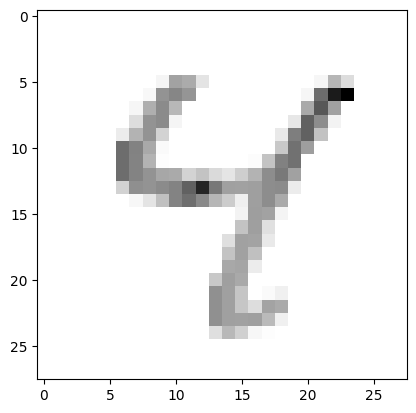

In [16]:
idx = 6
plt.imshow(x_test[idx])
print(np.argmax(predictions[idx]))
plt.imshow(x_test[idx],plt.cm.binary)

In [17]:
predictions

array([[1.0153160e-08, 1.8956079e-09, 2.8388481e-06, ..., 9.9999487e-01,
        2.8781639e-11, 2.7768280e-08],
       [1.0565983e-07, 6.3383467e-02, 9.3591553e-01, ..., 1.8424274e-09,
        5.9438543e-04, 9.4667669e-09],
       [3.3540053e-07, 9.9964678e-01, 3.4743025e-05, ..., 2.6524251e-05,
        2.5802833e-04, 9.9878332e-07],
       ...,
       [3.4425054e-09, 2.5226510e-07, 7.9783211e-09, ..., 5.6352383e-05,
        2.1260412e-06, 3.5863183e-04],
       [1.3712277e-06, 4.1958219e-07, 2.3879126e-08, ..., 3.8857149e-07,
        3.0100465e-04, 2.8077178e-09],
       [3.5063289e-07, 2.5518938e-07, 4.8183574e-07, ..., 3.1091038e-10,
        7.7834045e-07, 4.6918114e-09]], dtype=float32)

In [18]:
(x_train_new,y_train_new),(x_test_new,y_test_new) = mnist.load_data()

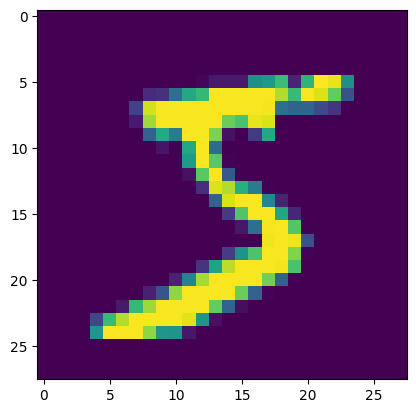

In [19]:
plt.imshow(x_train_new[0])

In [20]:
predictions = new_model.predict([x_test_new])
# model.predict([x_train[0]])
predictions.shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

7


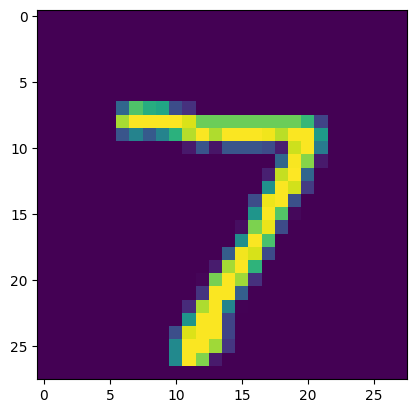

In [21]:
plt.imshow(x_test_new[0])
print(np.argmax(predictions[0]))

In [23]:
with open('../data/digit_7.bin', 'wb') as f:
    f.write(x_test_new[0])

In [28]:
seven = x_test_new[0]

In [31]:
seven = np.pad(seven, [(0, 4), (0, 4)], mode='constant')

In [32]:
seven.shape

(32, 32)

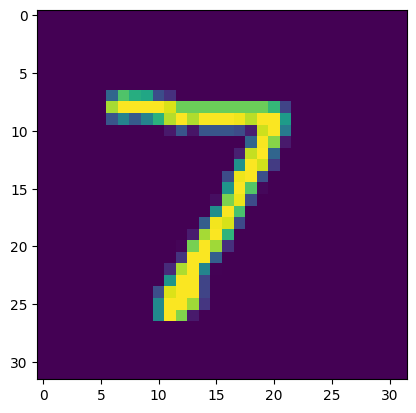

In [33]:
plt.imshow(seven)

In [34]:
with open('../data/digit_7.bin', 'wb') as f:
    f.write(seven)